## Wildfire data from sqlite database

In [208]:
import sqlite3
import pandas as pd

# Create the connection
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT FIRE_NAME, FIRE_YEAR, DISCOVERY_DOY, STAT_CAUSE_DESCR, FIRE_SIZE, LATITUDE, LONGITUDE FROM Fires WHERE FIRE_YEAR > 2001", cnx)

In [209]:
pd.set_option('display.max_columns', 100)
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE
0,FOUNTAIN,2005,33,Miscellaneous,0.10,40.036944,-121.005833
1,PIGEON,2004,133,Lightning,0.25,38.933056,-120.404444
2,SLACK,2004,152,Debris Burning,0.10,38.984167,-120.735556
3,DEER,2004,180,Lightning,0.10,38.559167,-119.913333
4,STEVENOT,2004,180,Lightning,0.10,38.559167,-119.933056


In [210]:
df.shape

(1125314, 7)

In [212]:
df.isnull().sum()

FIRE_NAME           518031
FIRE_YEAR                0
DISCOVERY_DOY            0
STAT_CAUSE_DESCR         0
FIRE_SIZE                0
LATITUDE                 0
LONGITUDE                0
dtype: int64

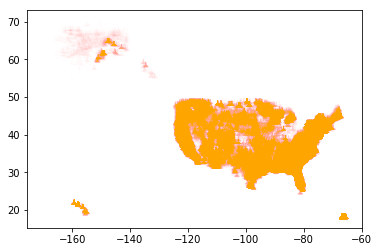

In [214]:
# visualize fire locations

plt.scatter(df["LONGITUDE"], df["LATITUDE"], alpha=.003, marker="2", color="orange")
plt.show()

In [215]:
# generalizing lat/lon to combine datasets

df["LAT_ROUND"] = round(df["LATITUDE"], 1)
df["LON_ROUND"] = round(df["LONGITUDE"], 1)

In [216]:
# transform fire year and discovery day of year into tradtitional date format

import datetime

fire_year = df["FIRE_YEAR"].tolist()
day_of_year = df["DISCOVERY_DOY"].tolist()

fire_dates = tuple(zip(fire_year, day_of_year))

def to_date(fire_dates):
    dates = []
    for row in fire_dates:
        dates.append(datetime.datetime(row[0], 1, 1) + datetime.timedelta(row[1] - 1))
    return dates

dates = to_date(fire_dates)

In [217]:
df["DATE"] = dates

In [218]:
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND,LON_ROUND,DATE
0,FOUNTAIN,2005,33,Miscellaneous,0.10,40.036944,-121.005833,40.0,-121.0,2005-02-02
1,PIGEON,2004,133,Lightning,0.25,38.933056,-120.404444,38.9,-120.4,2004-05-12
2,SLACK,2004,152,Debris Burning,0.10,38.984167,-120.735556,39.0,-120.7,2004-05-31
3,DEER,2004,180,Lightning,0.10,38.559167,-119.913333,38.6,-119.9,2004-06-28
4,STEVENOT,2004,180,Lightning,0.10,38.559167,-119.933056,38.6,-119.9,2004-06-28


## Historical MODIS data

In [219]:
modis_df = pd.read_csv("fire_archive_M6_66499.csv")
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2


In [220]:
modis_df.shape

(1780524, 15)

In [221]:
# generalizing lat/lon to combine datasets

modis_df["LAT_ROUND"] = round(modis_df["latitude"], 1)
modis_df["LON_ROUND"] = round(modis_df["longitude"], 1)
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.4,-155.1
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.3,-155.0
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.4,-155.0
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.3,-155.0
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.4,-155.1


In [230]:
# adding Date and Year column to combine datasets on
import datetime

modis_df["DATE"] = pd.to_datetime(modis_df["acq_date"])
modis_df["FIRE_YEAR"] = pd.DatetimeIndex(modis_df["DATE"]).year
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,FIRE_YEAR,DATE
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.4,-155.1,2001,2001-01-01
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.3,-155.0,2001,2001-01-01
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.4,-155.0,2001,2001-01-01
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.3,-155.0,2001,2001-01-01
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.4,-155.1,2001,2001-01-01


### Brainstorming steps

- trim down sqlite data to only neccessary columns
- use fire_year and discovery_day to get a date
- translate date into same format as modis data date
- use same number of decimal points for lat/lon between datasets
- join datasets on date/lat/lon
- add column for "reported fires" with true/false
- preprocess data
- use "reported fires" as target and create model

## Merging datasets

In [233]:
merged = pd.merge(modis_df, df, how='left', on=['LAT_ROUND', 'LON_ROUND', 'FIRE_YEAR'])
merged.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,FIRE_YEAR,DATE_x,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,DATE_y
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.4,-155.1,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.3,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.4,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.3,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.4,-155.1,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [234]:
merged.shape

(3771842, 26)

In [235]:
# these are the recorded fires

matches = merged.dropna()
matches.shape

(1711537, 26)

In [236]:
# create column of ones to add to these matched rows

matches["Recorded_fire"] = np.ones(1711537)
matches.head()

/Users/ljohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,FIRE_YEAR,DATE_x,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,DATE_y,Recorded_fire
44941,19.3487,-155.0864,305.8,2.9,1.6,2002-01-01,808,Terra,MODIS,20,6.2,289.0,34.2,N,2,19.3,-155.1,2002,2002-01-01,KUPUKUPU,136.0,Miscellaneous,3407.0,19.34330,-155.11750,2002-05-16,1.0
44942,19.3487,-155.0864,305.8,2.9,1.6,2002-01-01,808,Terra,MODIS,20,6.2,289.0,34.2,N,2,19.3,-155.1,2002,2002-01-01,KUPUKUPUIK,188.0,Miscellaneous,7.0,19.33330,-155.08330,2002-07-07,1.0
44943,19.3487,-155.0864,305.8,2.9,1.6,2002-01-01,808,Terra,MODIS,20,6.2,289.0,34.2,N,2,19.3,-155.1,2002,2002-01-01,PAOA,234.0,Smoking,0.1,19.30498,-155.08886,2002-08-22,1.0
44944,19.3385,-155.0623,334.4,2.8,1.6,2002-01-01,808,Terra,MODIS,100,6.2,294.1,158.1,N,2,19.3,-155.1,2002,2002-01-01,KUPUKUPU,136.0,Miscellaneous,3407.0,19.34330,-155.11750,2002-05-16,1.0
44945,19.3385,-155.0623,334.4,2.8,1.6,2002-01-01,808,Terra,MODIS,100,6.2,294.1,158.1,N,2,19.3,-155.1,2002,2002-01-01,KUPUKUPUIK,188.0,Miscellaneous,7.0,19.33330,-155.08330,2002-07-07,1.0


In [238]:
# merge back with full dataframe

#remerged = pd.merge(merged, matches, how='outer')
remerged.shape

(3771948, 27)

In [239]:
remerged["Recorded_fire"].value_counts()

1.0    1711643
Name: Recorded_fire, dtype: int64

In [240]:
remerged["Recorded_fire"].isnull().sum()

2060305

In [241]:
# add zeros as labels to rows that are not recorded fires

remerged["Recorded_fire"] = remerged["Recorded_fire"].fillna(value=0)
remerged["Recorded_fire"].value_counts()

0.0    2060305
1.0    1711643
Name: Recorded_fire, dtype: int64

In [152]:
# # This section for use when classes are too imbalanced

# #number of samples which are fires
# is_fire = len(remerged[remerged['Recorded_fire'] == 1])

# # indices of non fire samples
# non_fire_indices = remerged[remerged["Recorded_fire"] == 0].index

# # random sample non fire indices
# random_indices = np.random.choice(non_fire_indices, is_fire, replace=False)

# #find indices of fires
# fire_indices = remerged[remerged["Recorded_fire"] == 1].index

# # concat fire with non fire indices
# under_sample_indices = np.concatenate([fire_indices, random_indices])

# # get balanced dataframe
# under_sample = remerged.loc[under_sample_indices]

# under_sample["Recorded_fire"].value_counts()

0.0    5555
1.0    5555
Name: Recorded_fire, dtype: int64

In [248]:
remerged.satellite.value_counts()

Aqua     1942401
Terra    1829547
Name: satellite, dtype: int64

In [249]:
remerged.daynight.value_counts()

D    3134380
N     637568
Name: daynight, dtype: int64

In [250]:
# lets encode satellite and daynigt columns to use in model

remerged["satellite"] = remerged["satellite"].replace({"Aqua": 1, "Terra": 2})
remerged["daynight"] = remerged["daynight"].replace({"D": 1, "N": 2})
remerged.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,FIRE_YEAR,DATE_x,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,DATE_y,Recorded_fire
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,311.8,255.8,2,2,19.4,-155.1,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,2,MODIS,83,6.2,296.9,9.8,2,2,19.3,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,293.6,19.6,2,2,19.4,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,303.1,92.9,2,2,19.3,-155.0,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,2,MODIS,87,6.2,291.4,11.8,2,2,19.4,-155.1,2001,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0


In [251]:
features = ["brightness", "scan", "track", "acq_time", "satellite", "confidence",
            "version", "bright_t31", "frp", "daynight", "type"]

In [255]:
from sklearn.model_selection import train_test_split

X = remerged[features]
y = remerged["Recorded_fire"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [256]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [257]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_imputed, y_train.values)
y_pred = clf.predict(X_test_imputed)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.8702037407706888
0.8607228353557494


In [262]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_imputed, y_train.values)
y_pred = forest.predict(X_test_imputed)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.8924429008868092
0.8817935218071578
